In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from mpl_toolkits.mplot3d import Axes3D
# import statsmodels.api as sm
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
# from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

In [18]:
filterwarnings("ignore")

# DATA SOURCE

## All Data

In [19]:
IC40 = pd.read_csv("./data-sets/IC40_effectiveArea - IC40_effectiveArea.csv")
print(IC40.shape)
print("---"*30)
IC59 = pd.read_csv("./data-sets/IC59_effectiveArea - IC59_effectiveArea.csv")
print(IC59.shape)
print("---"*30)
IC79 = pd.read_csv("./data-sets/IC79_effectiveArea - IC79_effectiveArea.csv")
print(IC79.shape)
print("---"*30)
IC86II = pd.read_csv("./data-sets/IC86_II_effectiveArea - IC86_II_effectiveArea.csv")
print(IC86II.shape)
print("---"*30)
IC86I = pd.read_csv("./data-sets/IC86_I_effectiveArea - IC86_I_effectiveArea.csv")
print(IC86I.shape)
print("---"*30)

(2000, 5)
------------------------------------------------------------------------------------------
(2000, 5)
------------------------------------------------------------------------------------------
(2000, 5)
------------------------------------------------------------------------------------------
(2000, 5)
------------------------------------------------------------------------------------------
(2000, 5)
------------------------------------------------------------------------------------------


## Combined Data

In [20]:
Neutrino = pd.concat([IC40,IC59,IC79,IC86II,IC86I],axis=0)
print(Neutrino.shape)
data = Neutrino.copy()

(10000, 5)


# DATA INFORMATION

In [21]:
print(data.shape)
print("---"*30)
print(data.columns)
print("---"*30)
print(data.info())
print("---"*30)
print(data.describe().T)
print("---"*30)
print(data.corr())
print("---"*30)
print(data.isnull().sum())
print("---"*30)
print(data.where(data["E_nu/GeV_min"] < 2.8).value_counts().index)
print("---"*30)
print(data.where(data["A_Eff_cm2"] < 100000).value_counts().index)
print("---"*30)
print(data.where(data["Dec_nu_min_deg"] < -50).value_counts().index)
print("---"*30)

(10000, 5)
------------------------------------------------------------------------------------------
Index(['E_nu/GeV_min', 'E_nu/GeV_max', 'Dec_nu_min_deg', 'Dec_nu_max_deg',
       'A_Eff_cm2'],
      dtype='object')
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   E_nu/GeV_min    10000 non-null  float64
 1   E_nu/GeV_max    10000 non-null  float64
 2   Dec_nu_min_deg  10000 non-null  float64
 3   Dec_nu_max_deg  10000 non-null  float64
 4   A_Eff_cm2       10000 non-null  float64
dtypes: float64(5)
memory usage: 468.8 KB
None
------------------------------------------------------------------------------------------
                  count          mean           std    min    25%        50%  \
E_nu/GeV_min    10000.0  5.900000e+00  2.308795e+

## IGNORING 0 VALUES

In [22]:
data = data[data.A_Eff_cm2 != 0]

# CORRELATION - NORMALITY - HOMOGENEITY

## CORRELATION

In [23]:
corrPearson = data.corr(method="pearson")
corrSpearman = data.corr(method="spearman")

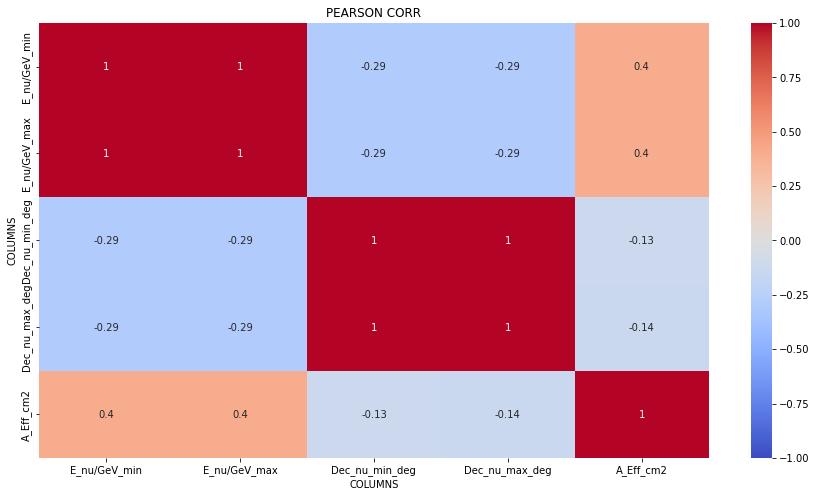

In [24]:
figure = plt.figure(figsize=(15,8))
sns.heatmap(corrPearson,annot=True,vmin=-1,vmax=1,center=0,cmap="coolwarm")
plt.title("PEARSON CORR")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")
plt.show()

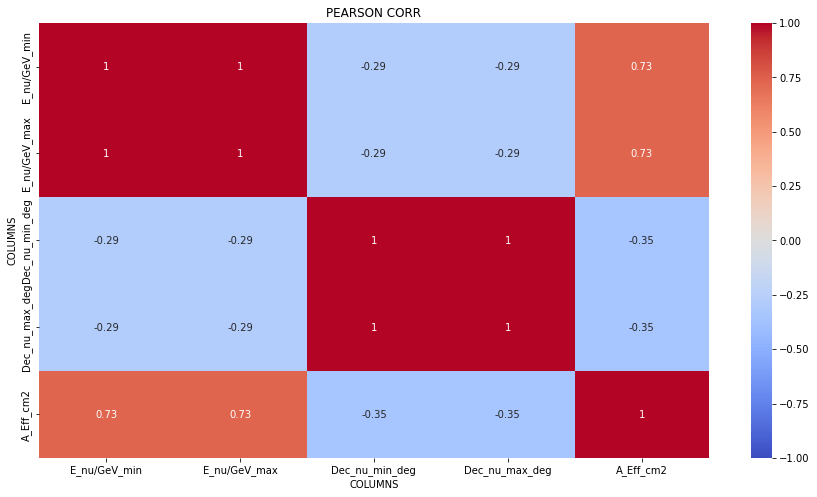

In [25]:
figure = plt.figure(figsize=(15,8))
sns.heatmap(corrSpearman,annot=True,vmin=-1,vmax=1,center=0,cmap="coolwarm")
plt.title("PEARSON CORR")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")
plt.show()

## NORMALITY

In [26]:
for i in data.columns:
    print(i,"----"*30)
    print("%.4f - %.4f" % shapiro(data[i]))

E_nu/GeV_min ------------------------------------------------------------------------------------------------------------------------
0.9732 - 0.0000
E_nu/GeV_max ------------------------------------------------------------------------------------------------------------------------
0.9732 - 0.0000
Dec_nu_min_deg ------------------------------------------------------------------------------------------------------------------------
0.9853 - 0.0000
Dec_nu_max_deg ------------------------------------------------------------------------------------------------------------------------
0.9892 - 0.0000
A_Eff_cm2 ------------------------------------------------------------------------------------------------------------------------
0.3665 - 0.0000


## HOMOGENEITY

In [27]:
print(levene(data["E_nu/GeV_min"],data["E_nu/GeV_max"],data["Dec_nu_min_deg"],
            data["Dec_nu_max_deg"],data["A_Eff_cm2"]))

LeveneResult(statistic=887.3300950461014, pvalue=0.0)


# VISUALIZATION

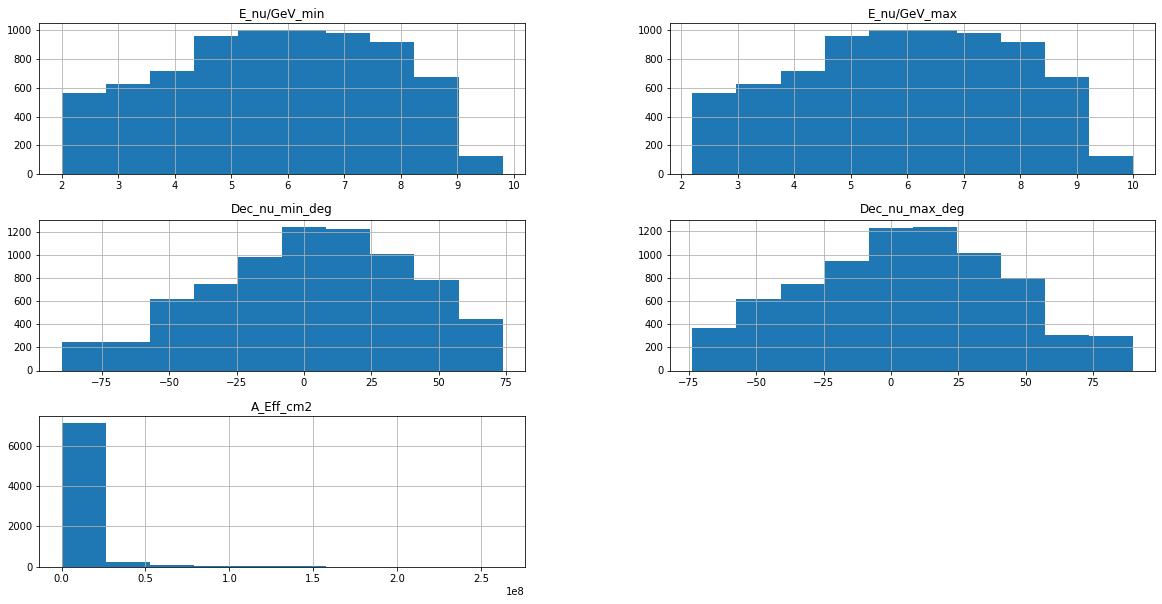

In [28]:
data.hist(figsize=(20,10))
plt.show()

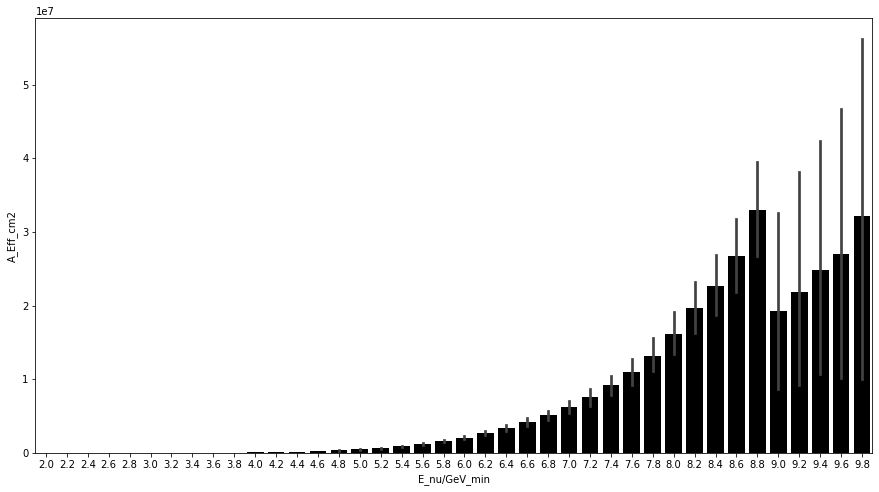

In [33]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="E_nu/GeV_min",y="A_Eff_cm2",data=data,color="black")
plt.show()

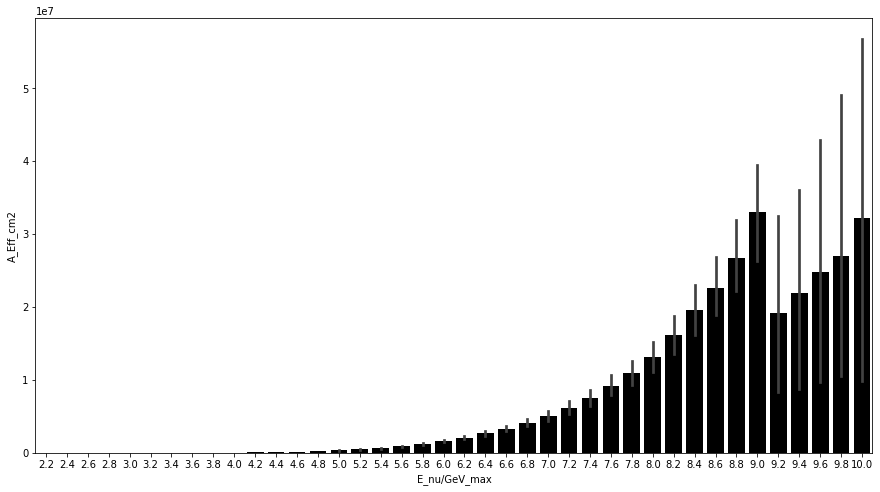

In [34]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="E_nu/GeV_max",y="A_Eff_cm2",data=data,color="black")
plt.show()

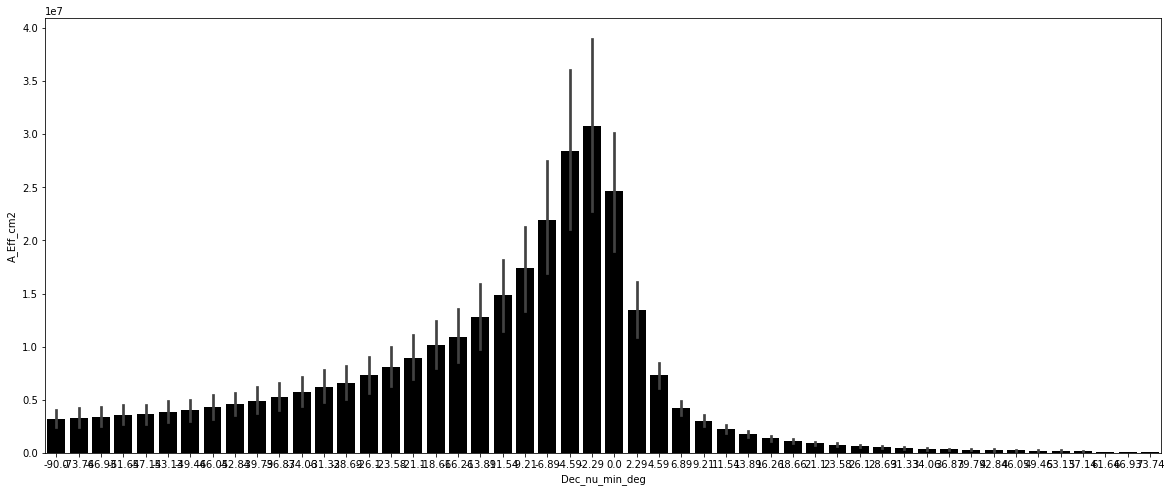

In [36]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="Dec_nu_min_deg",y="A_Eff_cm2",data=data,color="black")
plt.show()

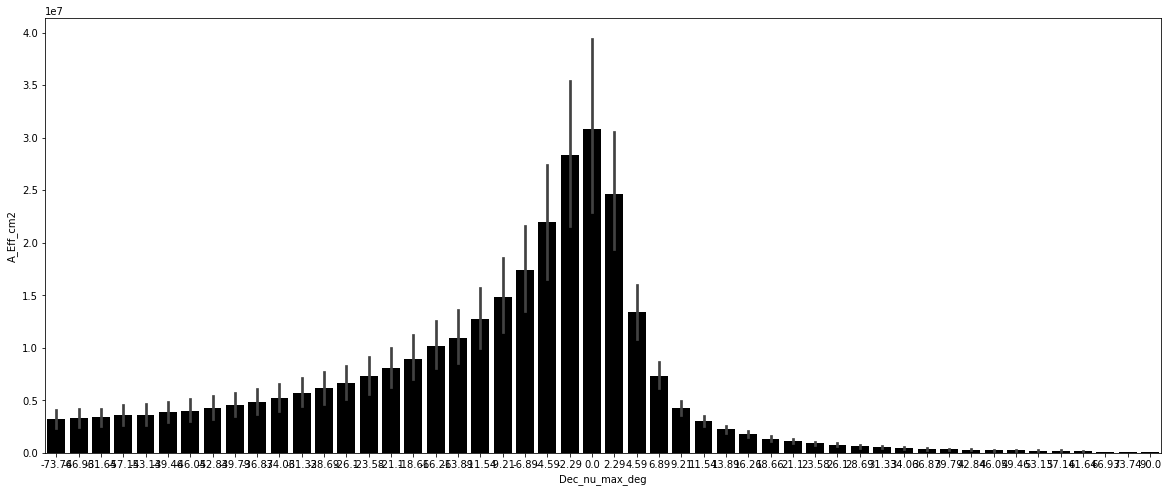

In [182]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="Dec_nu_max_deg",y="A_Eff_cm2",data=data,color="black")
plt.show()

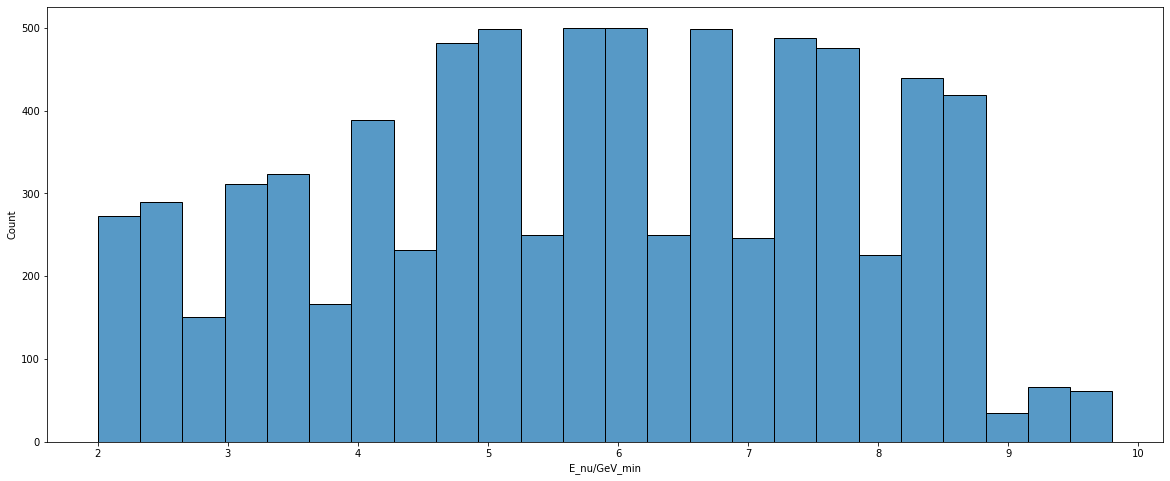

In [183]:
figure = plt.figure(figsize=(20,8))
sns.histplot(x="E_nu/GeV_min",data=data)
plt.show()

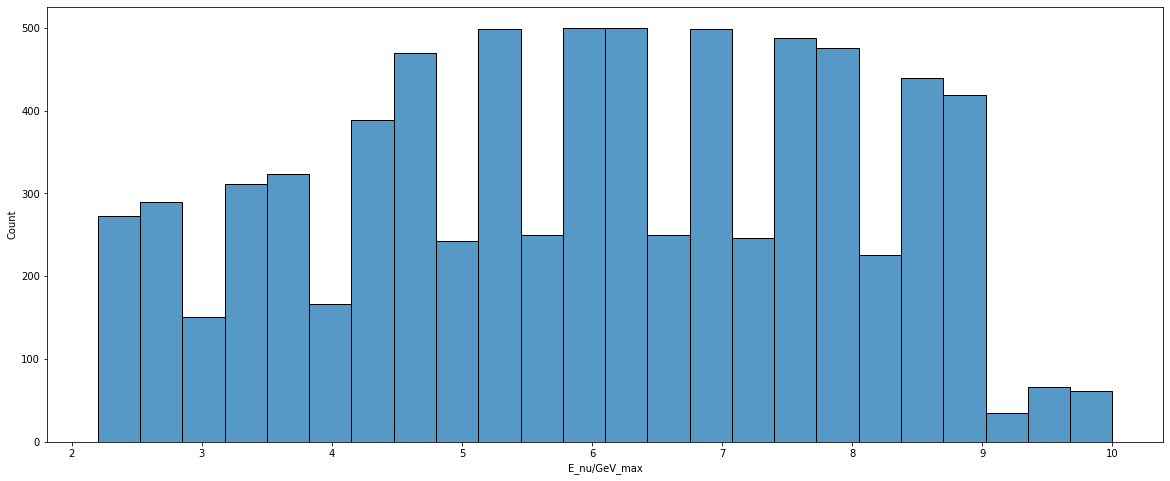

In [184]:
figure = plt.figure(figsize=(20,8))
sns.histplot(x="E_nu/GeV_max",data=data)
plt.show()

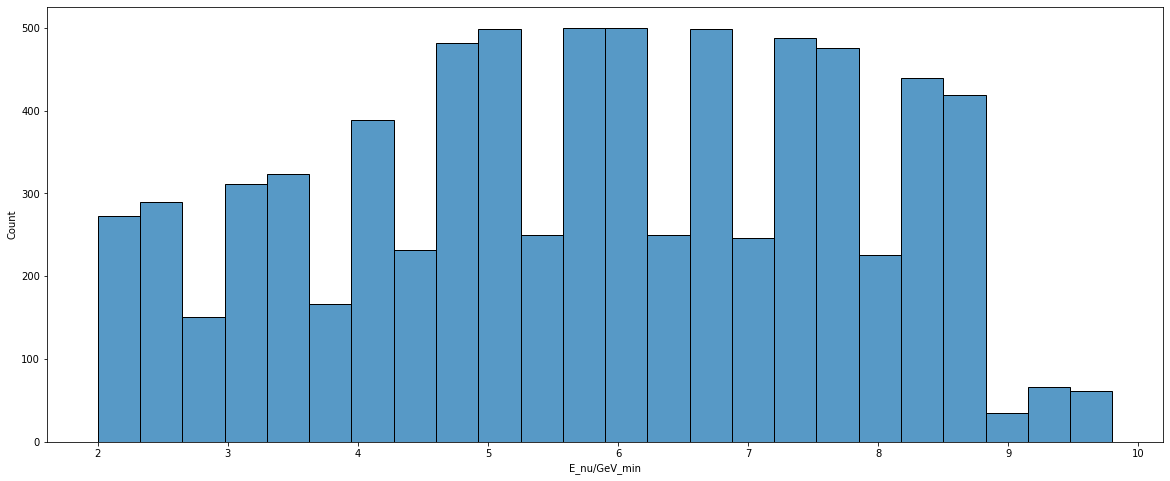

In [185]:
figure = plt.figure(figsize=(20,8))
sns.histplot(x="E_nu/GeV_min",data=data)
plt.show()

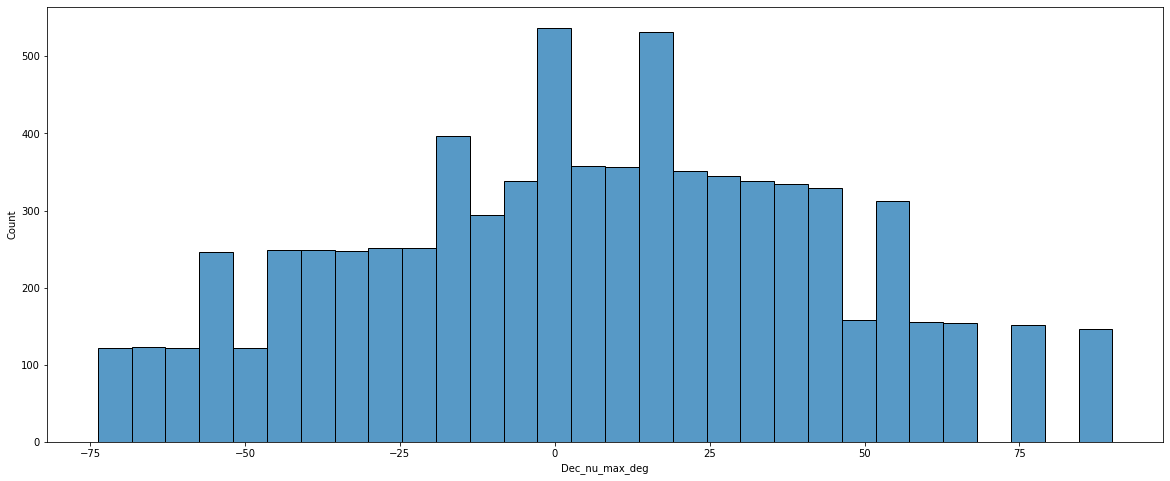

In [186]:
figure = plt.figure(figsize=(20,8))
sns.histplot(x="Dec_nu_max_deg",data=data)
plt.show()

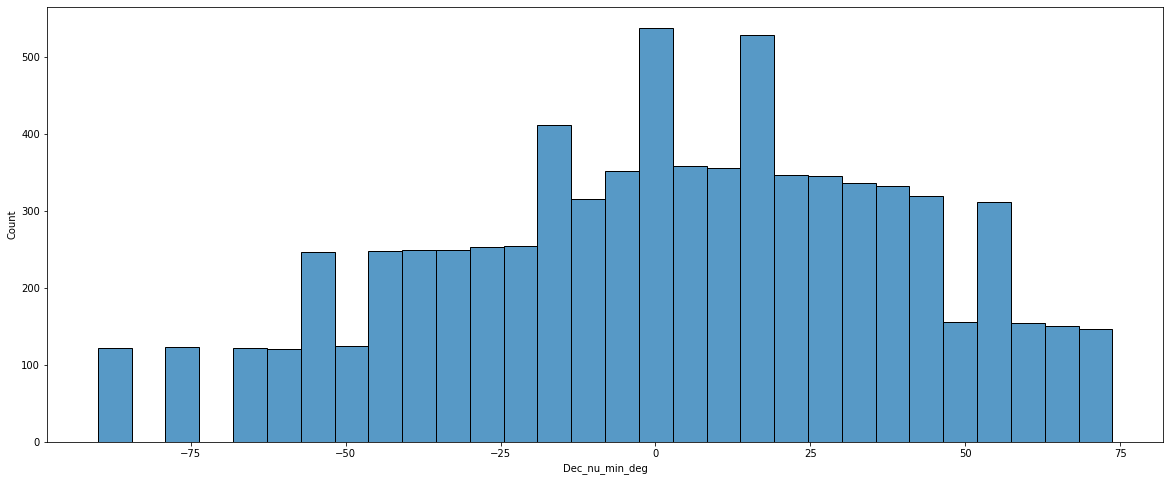

In [187]:
figure = plt.figure(figsize=(20,8))
sns.histplot(x="Dec_nu_min_deg",data=data)
plt.show()

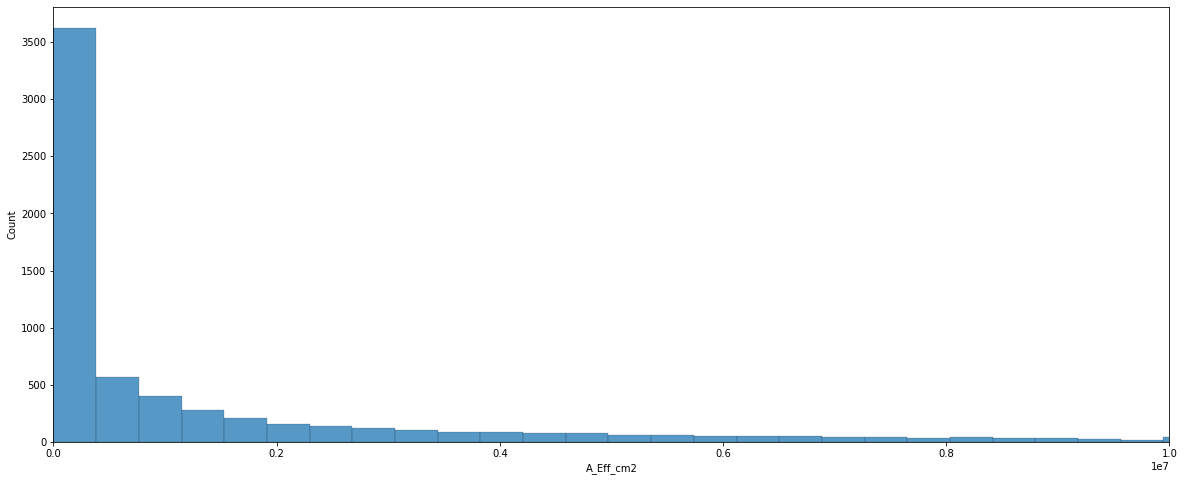

In [188]:
figure = plt.figure(figsize=(20,8))
sns.histplot(x="A_Eff_cm2",data=data)
plt.xlim(0,10000000)
plt.show()

<Figure size 1440x720 with 0 Axes>

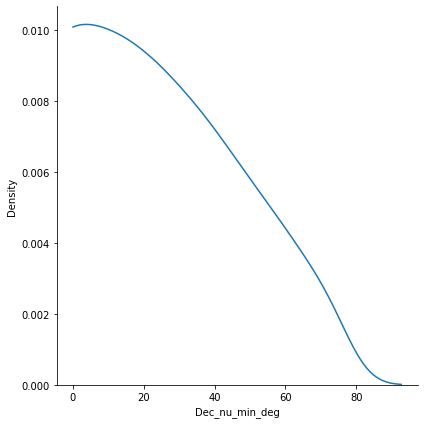

In [189]:
figure = plt.figure(figsize=(20,10))
sns.displot(
    data=data,
    x="Dec_nu_min_deg",
    kind="kde", height=6, clip=(0, None),
)
plt.show()

<Figure size 1440x720 with 0 Axes>

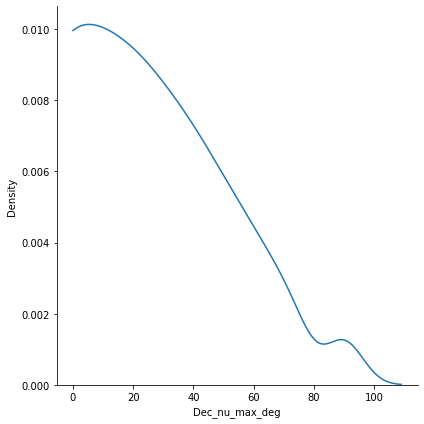

In [190]:
figure = plt.figure(figsize=(20,10))
sns.displot(
    data=data,
    x="Dec_nu_max_deg",
    kind="kde", height=6, clip=(0, None),
)
plt.show()

<Figure size 1440x720 with 0 Axes>

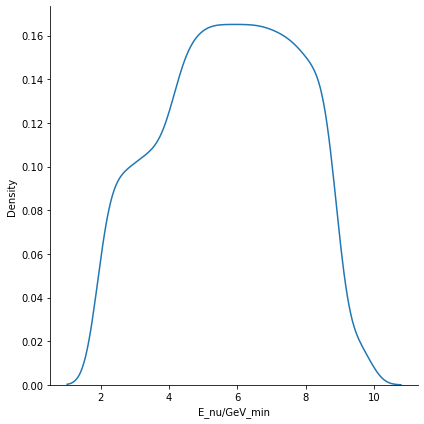

In [191]:
figure = plt.figure(figsize=(20,10))
sns.displot(
    data=data,
    x="E_nu/GeV_min",
    kind="kde", height=6, clip=(0, None),
)
plt.show()

<Figure size 1440x720 with 0 Axes>

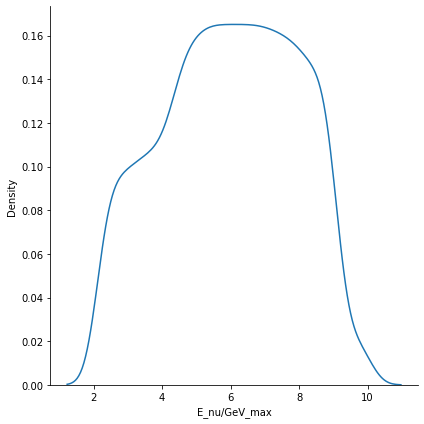

In [192]:
figure = plt.figure(figsize=(20,10))
sns.displot(
    data=data,
    x="E_nu/GeV_max",
    kind="kde", height=6, clip=(0, None),
)
plt.show()

<Figure size 1440x720 with 0 Axes>

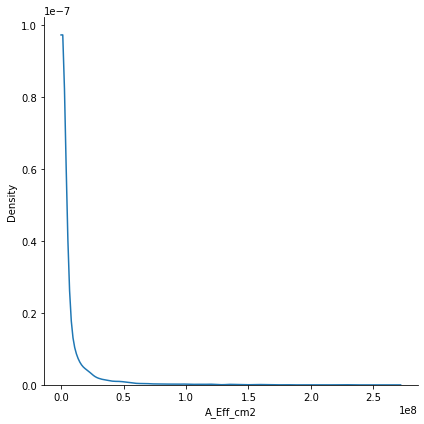

In [193]:
figure = plt.figure(figsize=(20,10))
sns.displot(
    data=data,
    x="A_Eff_cm2",
    kind="kde", height=6, clip=(0, None),
)
plt.show()

<Figure size 1440x720 with 0 Axes>

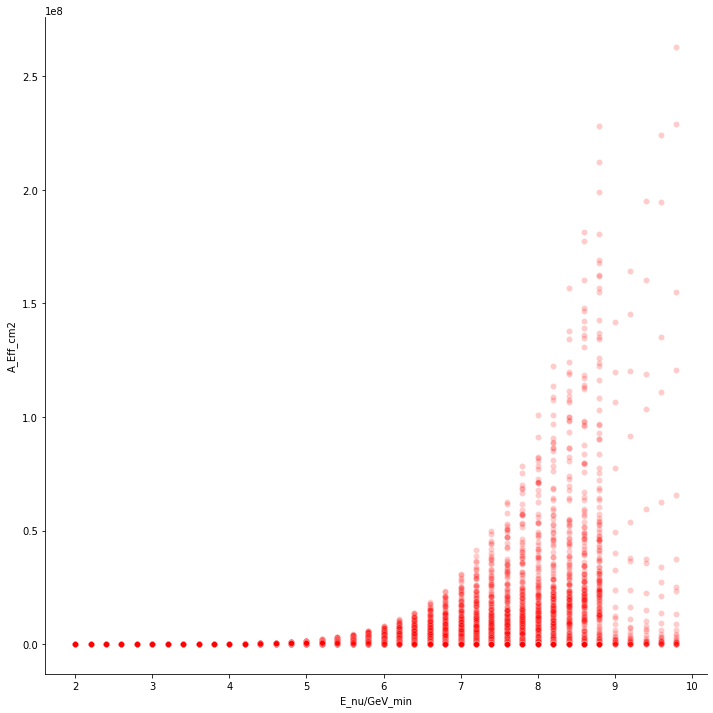

In [37]:
figure = plt.figure(figsize=(20,10))
sns.relplot(x="E_nu/GeV_min", y="A_Eff_cm2", sizes=(40, 400), alpha=.2, color="r",height=10, data=data)
plt.show()

<Figure size 1440x720 with 0 Axes>

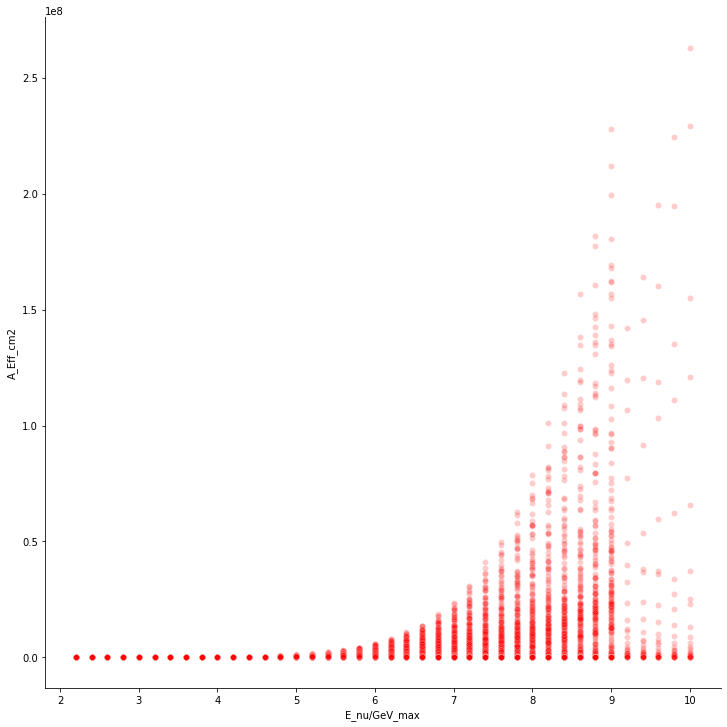

In [195]:
figure = plt.figure(figsize=(20,10))
sns.relplot(x="E_nu/GeV_max", y="A_Eff_cm2", sizes=(40, 400), alpha=.2, color="r",height=10, data=data)
plt.show()

<Figure size 1440x720 with 0 Axes>

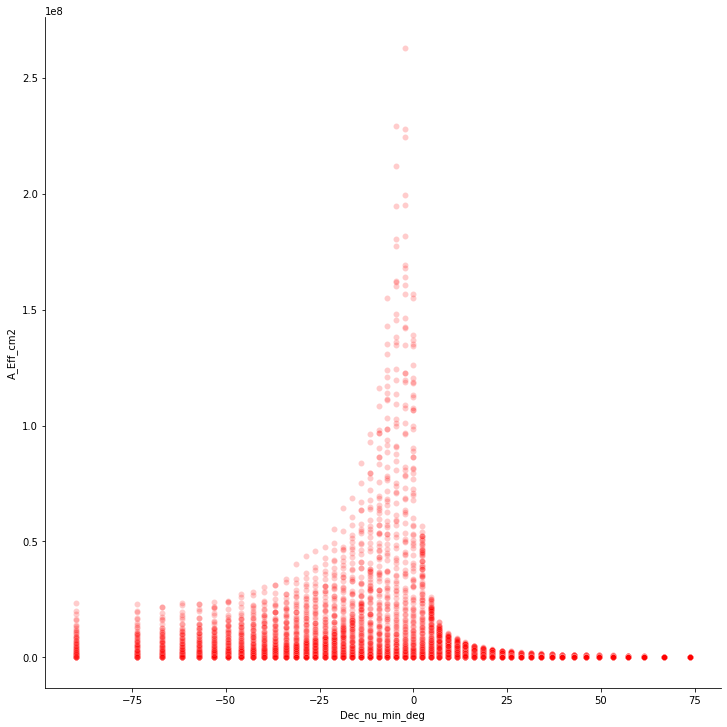

In [196]:
figure = plt.figure(figsize=(20,10))
sns.relplot(x="Dec_nu_min_deg", y="A_Eff_cm2", sizes=(40, 400), alpha=.2, color="r",height=10, data=data)
plt.show()

<Figure size 1440x720 with 0 Axes>

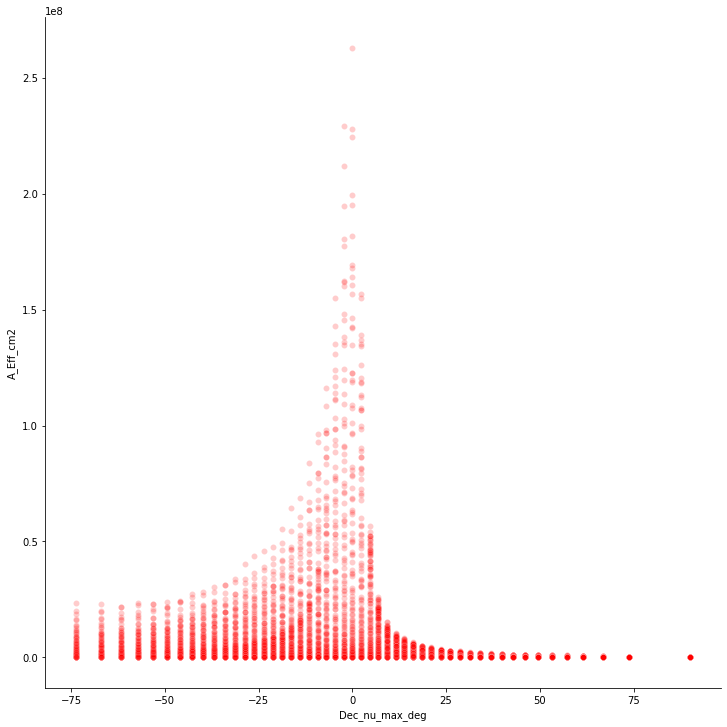

In [197]:
figure = plt.figure(figsize=(20,10))
sns.relplot(x="Dec_nu_max_deg", y="A_Eff_cm2", sizes=(40, 400), alpha=.2, color="r",height=10, data=data)
plt.show()

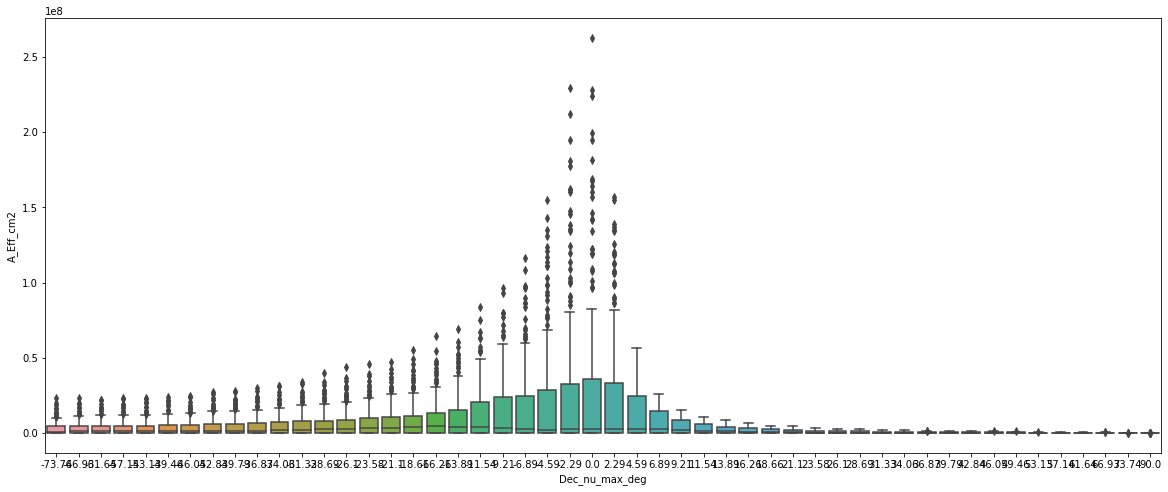

In [198]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="Dec_nu_max_deg",y="A_Eff_cm2",data=data)
plt.show()

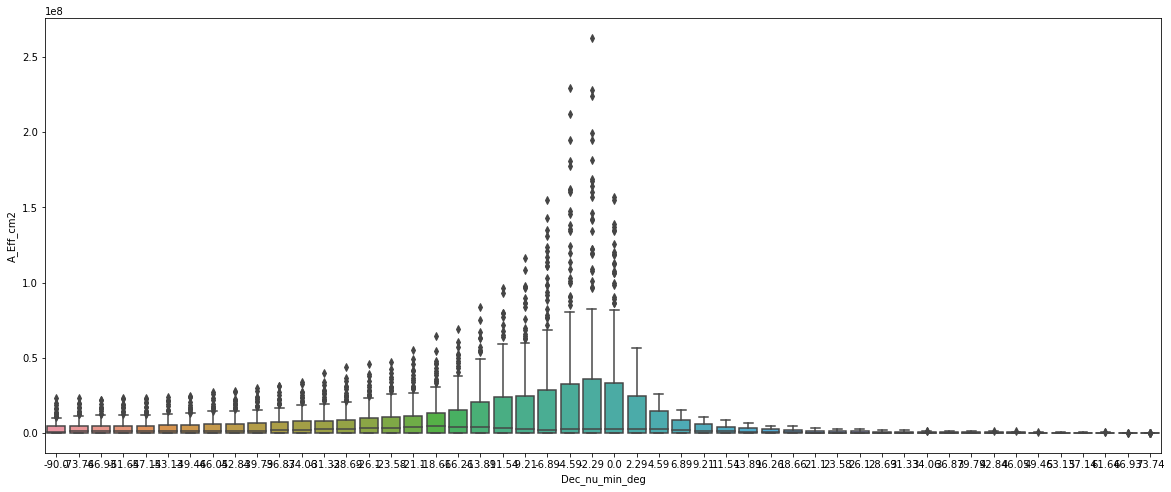

In [199]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="Dec_nu_min_deg",y="A_Eff_cm2",data=data)
plt.show()

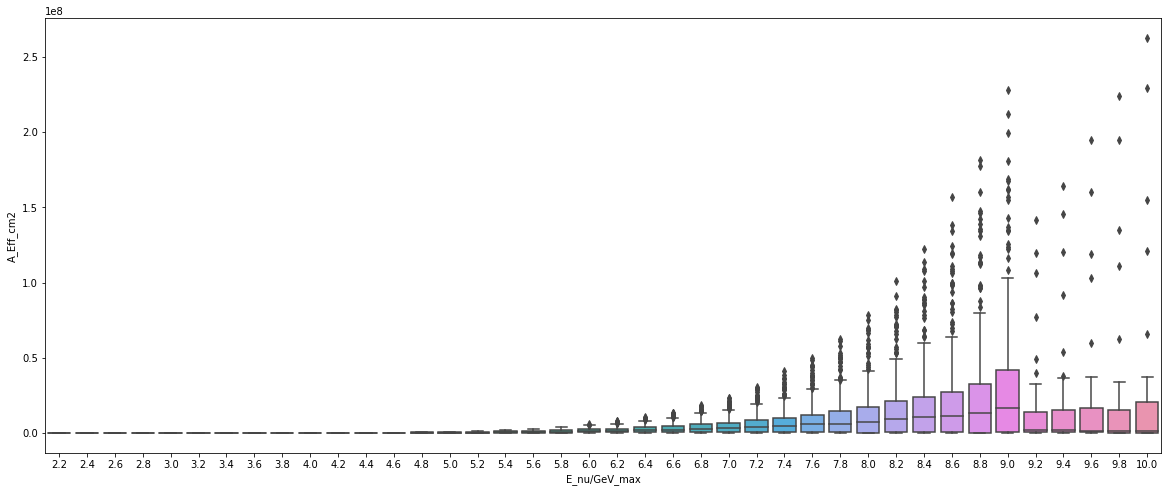

In [200]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="E_nu/GeV_max",y="A_Eff_cm2",data=data)
plt.show()

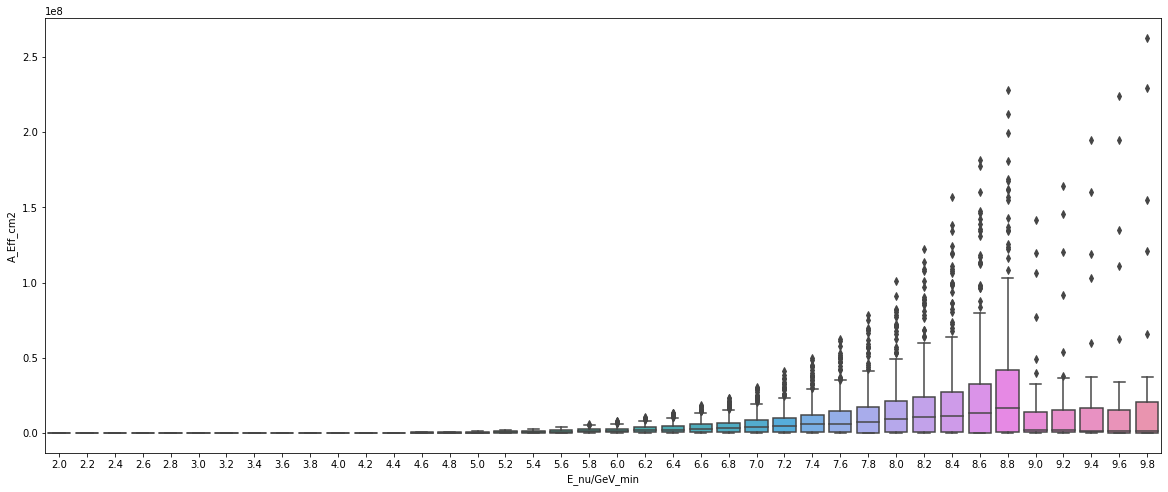

In [201]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="E_nu/GeV_min",y="A_Eff_cm2",data=data)
plt.show()

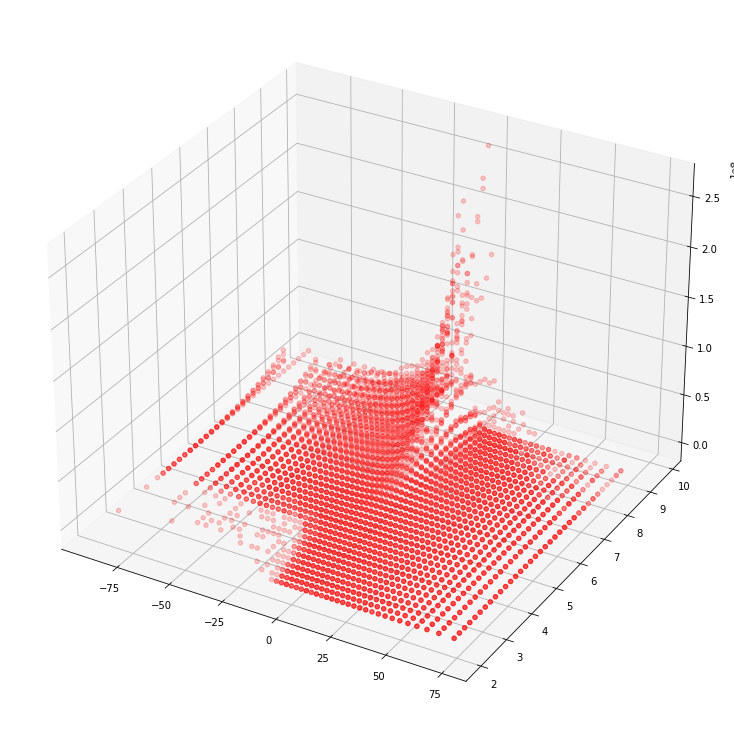

In [202]:
fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)
ax.scatter(data["Dec_nu_min_deg"], data["E_nu/GeV_min"], data["A_Eff_cm2"], c="red", s=20, alpha=0.2)
plt.show()

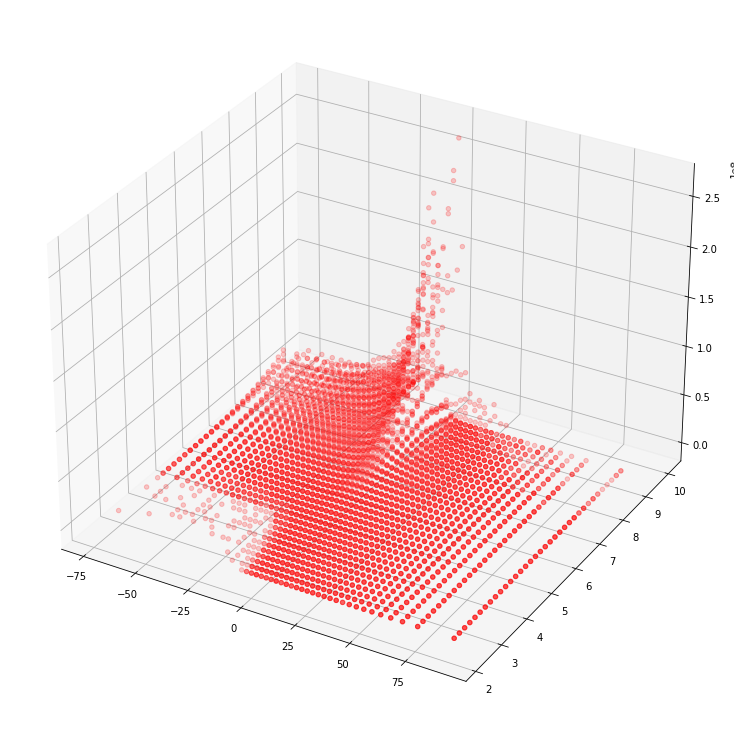

In [203]:
fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)
ax.scatter(data["Dec_nu_max_deg"], data["E_nu/GeV_max"], data["A_Eff_cm2"], c="red", s=20, alpha=0.2)
plt.show()

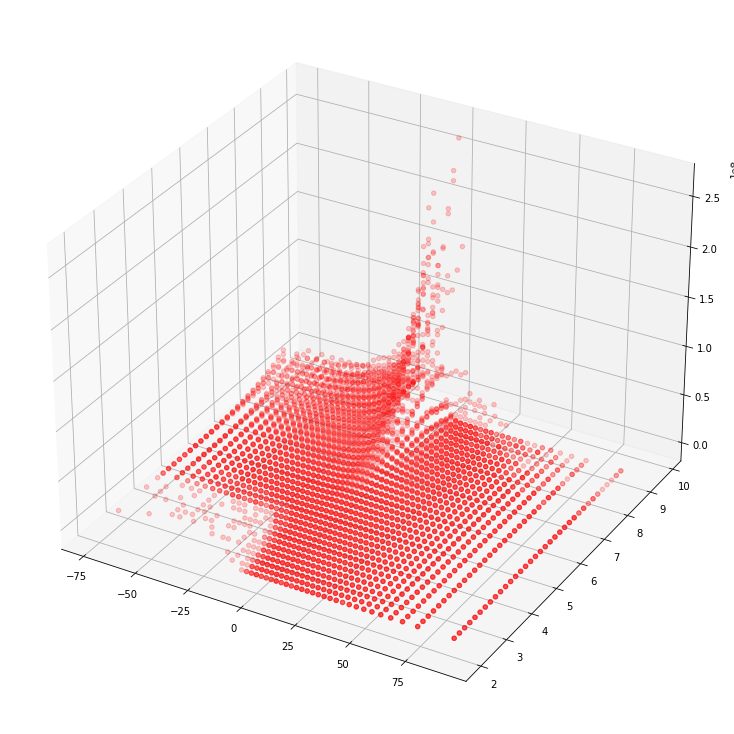

In [204]:
fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)
ax.scatter(data["Dec_nu_max_deg"], data["E_nu/GeV_min"], data["A_Eff_cm2"], c="red", s=20, alpha=0.2)
plt.show()

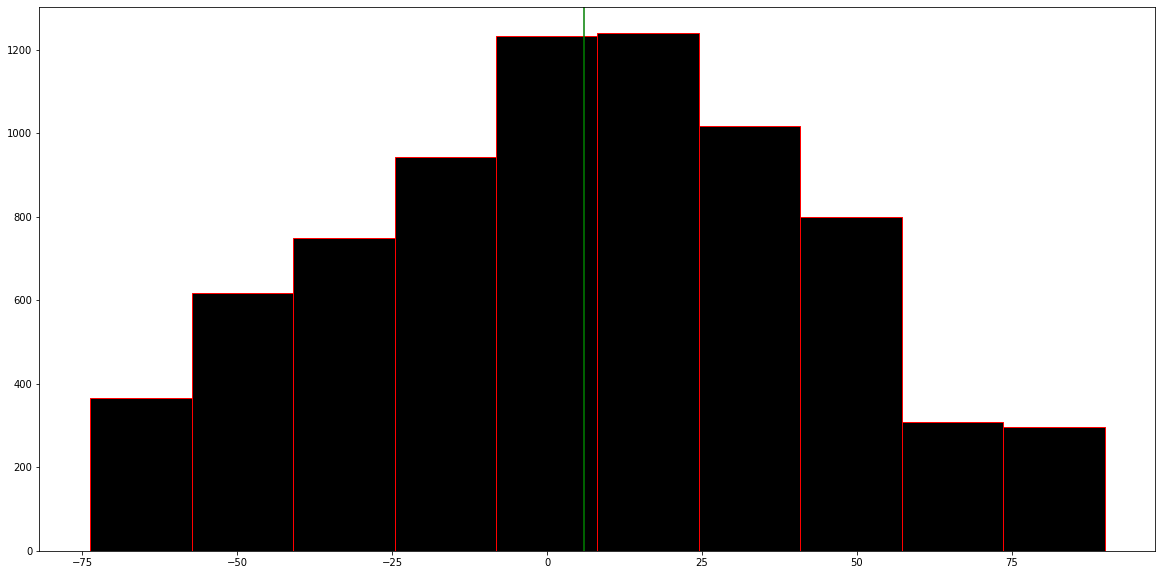

In [205]:
fig = plt.figure(figsize=(20,10))
median = np.median(data["E_nu/GeV_max"])
plt.hist(data["Dec_nu_max_deg"], edgecolor="red",color="black")
plt.axvline(median,color="green")
plt.show()

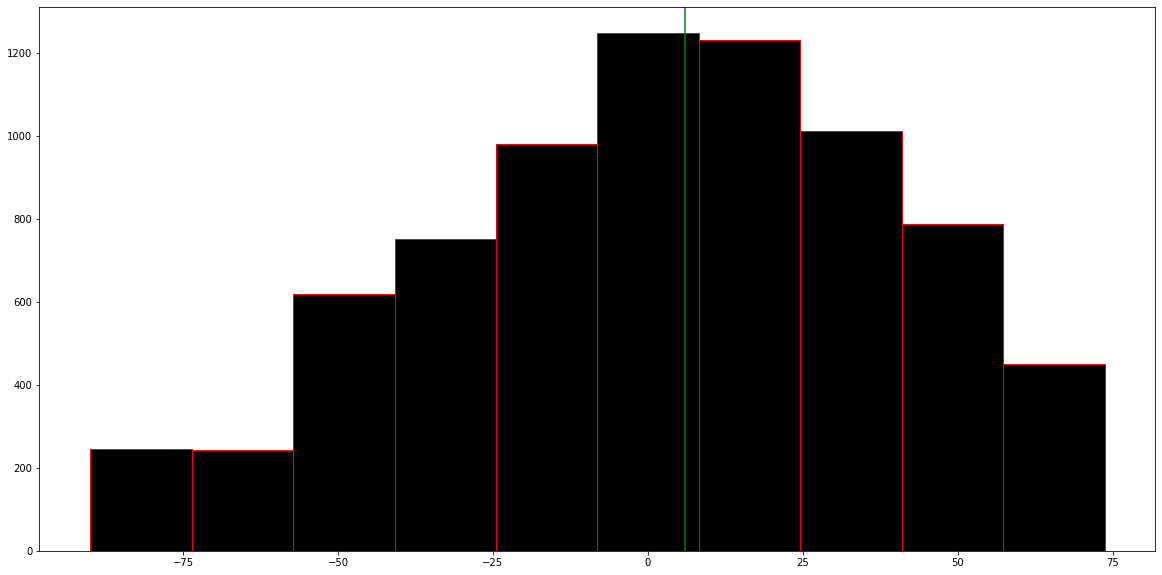

In [206]:
fig = plt.figure(figsize=(20,10))
median = np.median(data["E_nu/GeV_max"])
plt.hist(data["Dec_nu_min_deg"], edgecolor="red",color="black")
plt.axvline(median,color="green")
plt.show()

<Figure size 1440x720 with 0 Axes>

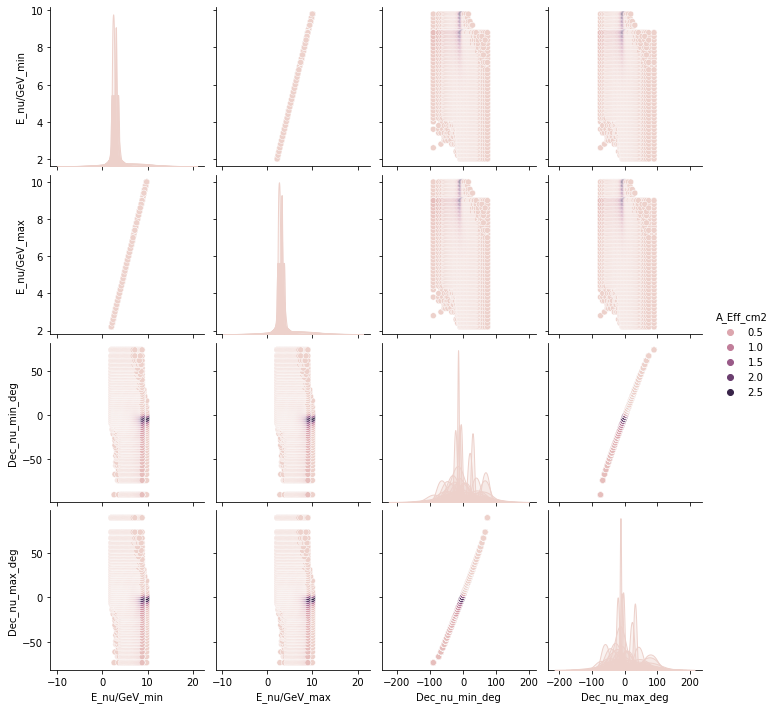

In [207]:
fig = plt.figure(figsize=(20,10))
sns.pairplot(data,hue="A_Eff_cm2")
plt.show()

# AGAINST VALUES

In [209]:
DataForC = data.copy()

In [210]:
clf = LocalOutlierFactor()
clf.fit_predict(DataForC)

array([1, 1, 1, ..., 1, 1, 1])

In [211]:
score = clf.negative_outlier_factor_
sortscore = np.sort(score)
print(sortscore[0:50])

[-2.9700204  -2.13700406 -2.11405795 -2.03458571 -1.79792634 -1.79190648
 -1.78352539 -1.62983806 -1.62321259 -1.59701722 -1.57377341 -1.5415006
 -1.50003983 -1.49459224 -1.48738043 -1.44004793 -1.43768335 -1.43125328
 -1.42700303 -1.4239831  -1.42321674 -1.42321298 -1.42263923 -1.42230069
 -1.40473343 -1.38601997 -1.38463954 -1.37810821 -1.37185847 -1.36967614
 -1.35869181 -1.35415316 -1.35274886 -1.35086954 -1.34893793 -1.34658147
 -1.34389442 -1.34292064 -1.33986123 -1.33908107 -1.3378244  -1.33571273
 -1.33451758 -1.33030981 -1.3273657  -1.32307332 -1.32224735 -1.32107834
 -1.31994616 -1.3166322 ]


In [212]:
point = sortscore[4]
print(DataForC[score == point])

     E_nu/GeV_min  E_nu/GeV_max  Dec_nu_min_deg  Dec_nu_max_deg    A_Eff_cm2
954           8.8           9.0           -4.59           -2.29  212120078.3


In [216]:
againstvalues = DataForC < point
print(DataForC[againstvalues].value_counts().sum())

0


# MODELS

## X & Y FOR MODELS

In [254]:
x = data.drop("A_Eff_cm2",axis=1)
y = data["A_Eff_cm2"]

xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2,random_state=42)

## REGRESSION MODELS

In [255]:
lm = LinearRegression().fit(xTrain,yTrain)
pls = PLSRegression().fit(xTrain,yTrain)
ridge = Ridge().fit(xTrain,yTrain)
lasso = Lasso().fit(xTrain,yTrain)
elasticnet = ElasticNet().fit(xTrain,yTrain)
knnr = KNeighborsRegressor().fit(xTrain,yTrain)
cartr = DecisionTreeRegressor(random_state=42).fit(xTrain,yTrain)
baggr = BaggingRegressor(random_state=42,bootstrap_features=True,verbose=False).fit(xTrain,yTrain)
rfr = RandomForestRegressor(random_state=42,verbose=False).fit(xTrain,yTrain)
gbmr = GradientBoostingRegressor(verbose=False).fit(xTrain,yTrain)
xgbr = XGBRegressor().fit(xTrain,yTrain)
lgbmr = LGBMRegressor().fit(xTrain,yTrain)
catbr = CatBoostRegressor(verbose=False).fit(xTrain,yTrain)

In [256]:
models = [lm,pls,ridge,lasso,elasticnet,knnr,
         cartr,baggr,rfr,gbmr,xgbr,lgbmr,catbr]

In [257]:
for model in models:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,xTest,yTest,cv=10,scoring="r2").mean()
    error = -cross_val_score(model,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
    print(name + ": ")
    print("-" * 10)
    print(R2CV)
    print(np.sqrt(error))
    print("-" * 30)

LinearRegression: 
----------
0.1619929471596385
14707976.300427046
------------------------------
PLSRegression: 
----------
0.15142046399362558
14808929.53485745
------------------------------
Ridge: 
----------
0.1619961932590343
14707972.853558116
------------------------------
Lasso: 
----------
0.1620248913979979
14707892.621538803
------------------------------
ElasticNet: 
----------
0.16308272904509608
14713211.361708762
------------------------------
KNeighborsRegressor: 
----------
0.8485859535988676
6292410.781648093
------------------------------
DecisionTreeRegressor: 
----------
0.8273483735151517
6565443.45425762
------------------------------
BaggingRegressor: 
----------
0.8528934622171814
6198218.640190704
------------------------------
RandomForestRegressor: 
----------
0.893093753730609
5157265.803982529
------------------------------
GradientBoostingRegressor: 
----------
0.8947541696177759
4971525.865233575
------------------------------
XGBRegressor: 
----------

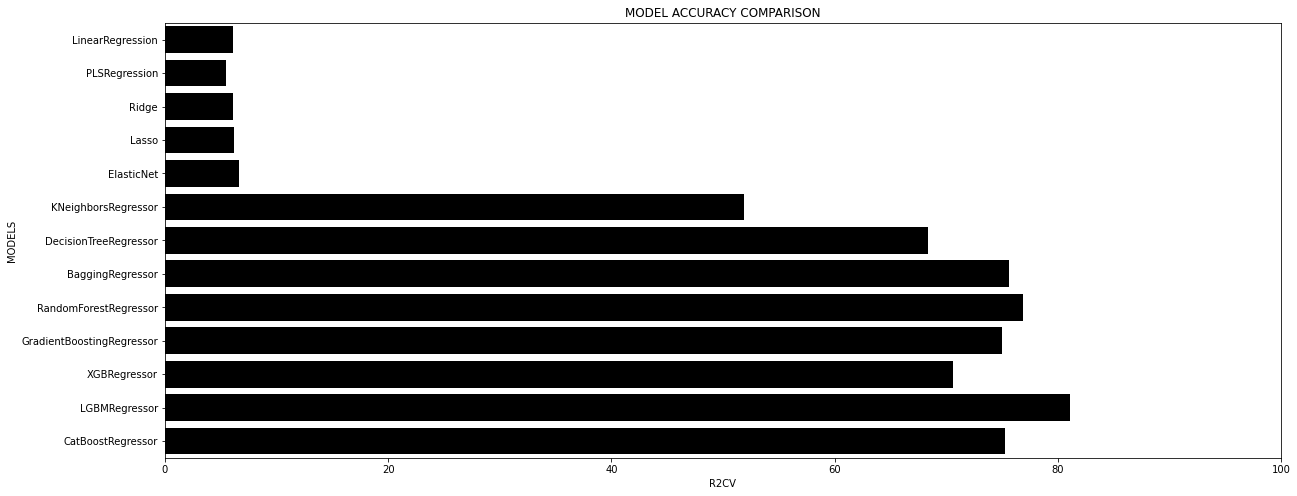

In [252]:
r = pd.DataFrame(columns=["MODELS","R2CV"])
for model in models:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,xTest,yTest,cv=10,scoring="r2").mean()
    result = pd.DataFrame([[name,R2CV*100]],columns=["MODELS","R2CV"])
    r = r.append(result)
    
figure = plt.figure(figsize=(20,8))   
sns.barplot(x="R2CV",y="MODELS",data=r,color="k")
plt.xlabel("R2CV")
plt.ylabel("MODELS")
plt.xlim(0,100)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

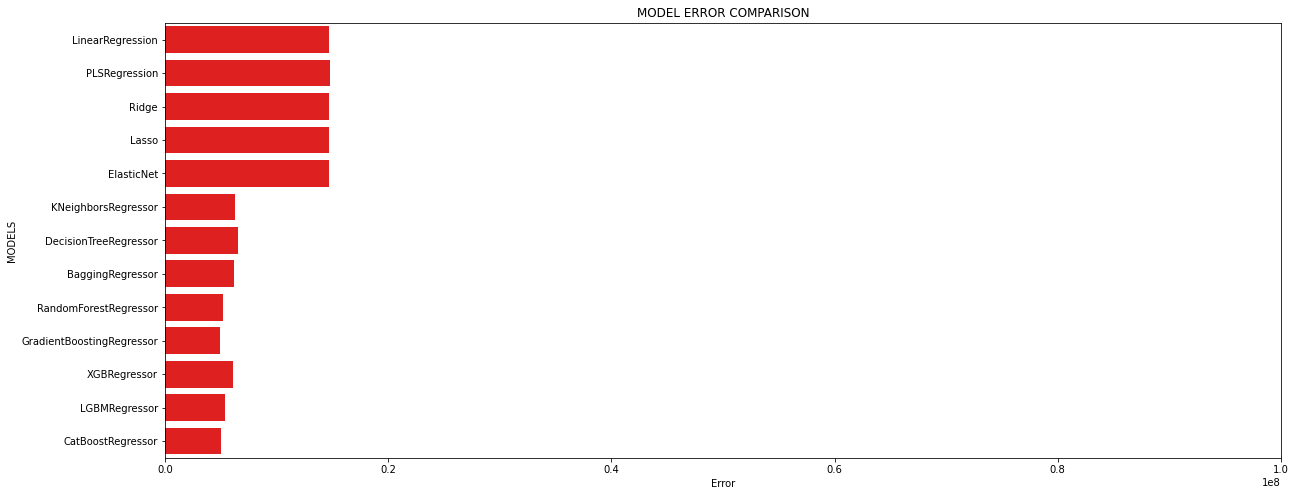

In [226]:
r = pd.DataFrame(columns=["MODELS","error"])
for model in models:
    name = model.__class__.__name__
    error = -cross_val_score(model,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
    result = pd.DataFrame([[name,np.sqrt(error)]],columns=["MODELS","error"])
    r = r.append(result)
    
figure = plt.figure(figsize=(20,8))   
sns.barplot(x="error",y="MODELS",data=r,color="r")
plt.xlabel("Error")
plt.ylabel("MODELS")
plt.xlim(0,100000000)
plt.title("MODEL ERROR COMPARISON")
plt.show()

## OLS

In [227]:
ols = sm.OLS(yTrain,yTrain).fit()

print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:              A_Eff_cm2   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                                inf
Date:                Sat, 03 Apr 2021   Prob (F-statistic):                        0.00
Time:                        16:39:58   Log-Likelihood:                             inf
No. Observations:                6056   AIC:                                       -inf
Df Residuals:                    6055   BIC:                                       -inf
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## PCR

In [228]:
pca = PCA()
xRTrain = pca.fit_transform(scale(xTrain))
xRTest = pca.fit_transform(scale(xTest))

In [229]:
lmP = LinearRegression().fit(xRTrain,yTrain)
R2CV = cross_val_score(lmP,xRTest,yTest,cv=10,scoring="r2").mean()
error = -cross_val_score(lmP,xRTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()

print(R2CV)
print(np.sqrt(error))

0.16192303952487883
14708398.560477423


## ANN

In [230]:
scaler = StandardScaler().fit(xTrain,yTrain)
xRTrain = scaler.transform(xTrain)
xRTest = scaler.transform(xTest)

In [231]:
mlpr = MLPRegressor().fit(xTrain,yTrain)

R2CV = cross_val_score(mlpr,xRTest,yTest,cv=10,scoring="r2").mean()
error = -cross_val_score(mlpr,xRTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()

print(R2CV)
print(np.sqrt(error))

-0.1295628883784993
17032357.704375286
